In [63]:
import numpy as np
import pandas as pd

In [64]:
df = pd.read_csv("data.csv")
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [65]:
df.shape

(8518, 8)

In [66]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [67]:
df.describe

<bound method NDFrame.describe of                Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0       

In [68]:
df.columns = df.columns.str.strip()

df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [69]:
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [71]:
df.fillna({'Reviewer Name': 'Anonymous', 
           'Review Title': 'No Title', 
           'Place of Review': 'Unknown', 
           'Up Votes': df['Up Votes'].median(), 
           'Down Votes': df['Down Votes'].median(), 
           'Month': 'Unknown'}, 
          inplace=True)

In [72]:
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64


In [73]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Unknown,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [74]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [75]:
df['Up Votes'] = df['Up Votes'].astype(int)
df['Down Votes'] = df['Down Votes'].astype(int)

In [76]:
df.columns = df.columns.str.replace(' ', '_')

# Check the updated data types and column names
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int32
Down_Votes                  int32
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


In [77]:
print(df.describe())

          Up_Votes   Down_Votes      Ratings
count  8518.000000  8518.000000  8518.000000
mean      0.390937     0.121625     4.181028
std      11.607097     3.246117     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


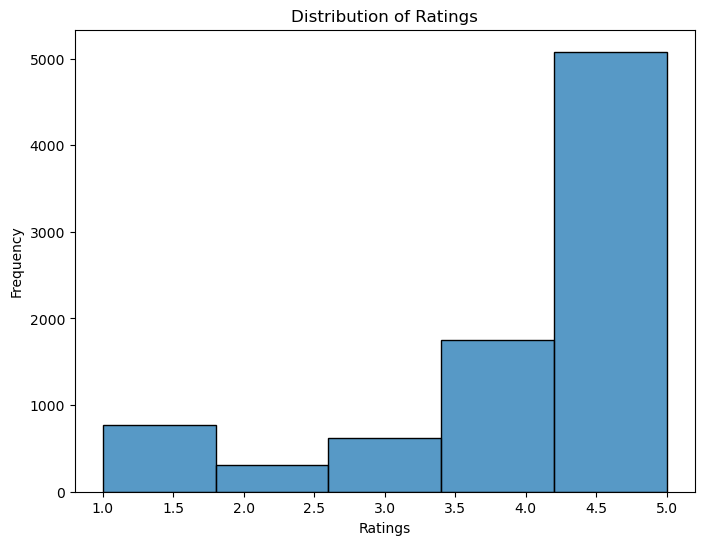

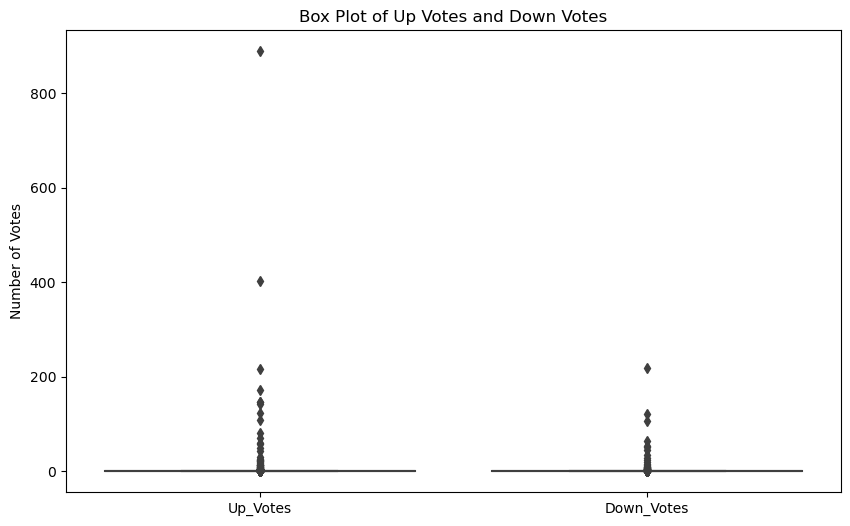

In [78]:
## Data Vizualisation
##distribution analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Box plot of Up Votes and Down Votes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\farheen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
def get_sentiment_nltk(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # Return 'Neutral' for NaN values

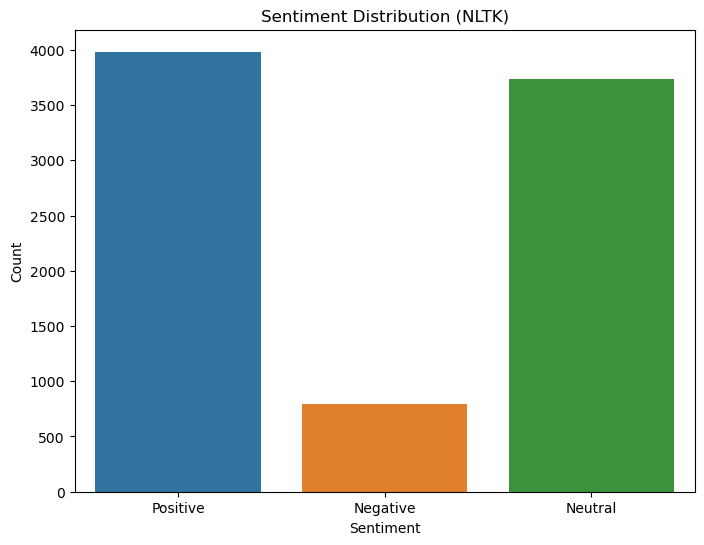

In [81]:
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)

# Visualize sentiment distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Text Data

In [82]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.467598
Neutral     0.438835
Negative    0.093567
Name: Sentiment_NLTK, dtype: float64

In [83]:
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4780, 9)

In [84]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.833264
Negative    0.166736
Name: Sentiment_NLTK, dtype: float64

In [85]:
# Define a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': 0}

# Map sentiment categories to numerical values in the 'Sentiment_NLTK' column
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())

  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
3       Positive                       1
4       Positive                       1


In [86]:
df.loc[0, 'Review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [87]:
df = df[["Review_text", "Sentiment_NLTK_numeric"]] 
df.shape

(4780, 2)

In [88]:
X = df.Review_text # the column text contains textual data to extract features from
y = df.Sentiment_NLTK_numeric # this is the column we are learning to predict. 
print(X.shape, y.shape)

(4780,) (4780,)


In [89]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3585,) (3585,)
(1195,) (1195,)


## Data cleaning

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [91]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [92]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\farheen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 703 ms
Wall time: 1.75 s
(3585, 2547)


In [95]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1195, 2547)


In [96]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 3.24 ms


MultinomialNB()

In [99]:
import mlflow
mlflow.set_experiment("review_sentiment_prediction")

<Experiment: artifact_location='file:///C:/Users/farheen/mlruns/534249052298100027', creation_time=1711856884659, experiment_id='534249052298100027', last_update_time=1711856884659, lifecycle_stage='active', name='review_sentiment_prediction', tags={}>

## Running the Experiment

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
import warnings

warnings.filterwarnings('ignore')

In [102]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 30.9 s
Wall time: 1min 32s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x00000150BC803880>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


## Auto Logging All Experiment Runs using MLFlow

In [106]:
import joblib
from joblib import Memory

import os
import mlflow

In [107]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 17.6 s
Wall time: 49.7 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x00000150BC803880>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


In [113]:
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train, y_train)  # Here you should use clf instead of grid_search

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))


2024/03/31 10:14:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd56c56d264074a3d94a59389eba34f2e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/31 10:14:29 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024/03/31 10:16:13 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: total: 1min 5s
Wall time: 1min 43s
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 57.1 s
Wall time: 1min 48s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x00000150BC803880>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9642857142857143


In [118]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from joblib import Memory  # Import Memory from joblib

# Create a memory object for caching intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipelines for different algorithms
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features': [1000, 1500, 2000, 5000], 
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features': [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    grid_search.fit(X_train, y_train)
    
    # Log the best model and parameters
    with mlflow.start_run() as run:
        mlflow.sklearn.autolog()
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric('f1_score', f1_score(y_test, grid_search.predict(X_test)))
    
    best_models[algo] = grid_search.best_estimator_

    print('Best parameters found:', grid_search.best_params_)
    print('Score on Test Data:', f1_score(y_test, grid_search.predict(X_test)))


2024/03/31 12:15:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd2ce356466ea40abbb14f73e3a9470f6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/31 12:15:33 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits


2024/03/31 12:15:52 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.
2024/03/31 12:15:52 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.
2024/03/31 12:15:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1ecab7993c4a40c48c027694d86c1b37', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/31 12:15:52 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Best parameters found: {'classifier__alpha': 1, 'vectorization__max_features': 2000}
Score on Test Data: 0.9605133267522211
********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/03/31 12:16:15 INFO mlflow.sklearn.utils: Logging the 5 best runs, 7 runs will be omitted.
2024/03/31 12:16:19 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.
2024/03/31 12:16:19 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.
2024/03/31 12:16:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '672e050a02704f51813047c2aea86646', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/31 12:16:19 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Best parameters found: {'classifier__max_depth': None, 'vectorization__max_features': 2000}
Score on Test Data: 0.9668341708542714
********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits


2024/03/31 12:22:22 INFO mlflow.sklearn.utils: Logging the 5 best runs, 31 runs will be omitted.
2024/03/31 12:22:23 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.
2024/03/31 12:22:23 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Best parameters found: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.4, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'vectorization__max_features': 1500}
Score on Test Data: 0.9718592964824121


In [130]:
import mlflow
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

# Load data
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

X = data.data
y = data.target

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Define the parameters for grid search
parameters = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.5, 1.0, 1.5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X, y)

# Log parameters and metrics to MLflow
with mlflow.start_run():
    # Log parameters
    for key, value in grid_search.best_params_.items():
        mlflow.log_param(key, value)
    
    # Log score
    mlflow.log_metric("score", grid_search.best_score_)
    
    # Log model
    mlflow.sklearn.log_model(grid_search.best_estimator_, "model")


2024/03/31 18:21:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '38e9d15c4747466c8120e8f8dc202672', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/31 18:21:16 WARNING mlflow.sklearn: Unrecognized dataset type <class 'list'>. Dataset logging skipped.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


2024/03/31 18:23:16 INFO mlflow.sklearn.utils: Logging the 5 best runs, 13 runs will be omitted.
